In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

In [4]:
from src.utils.data_utils import load_datasets
train_ds, val_ds, test_ds = load_datasets()

In [5]:
MI_ecg = train_ds.find_ecg_with_subclass('MI', 27)

In [6]:
MI_ecg.recording.shape

torch.Size([12, 5000])

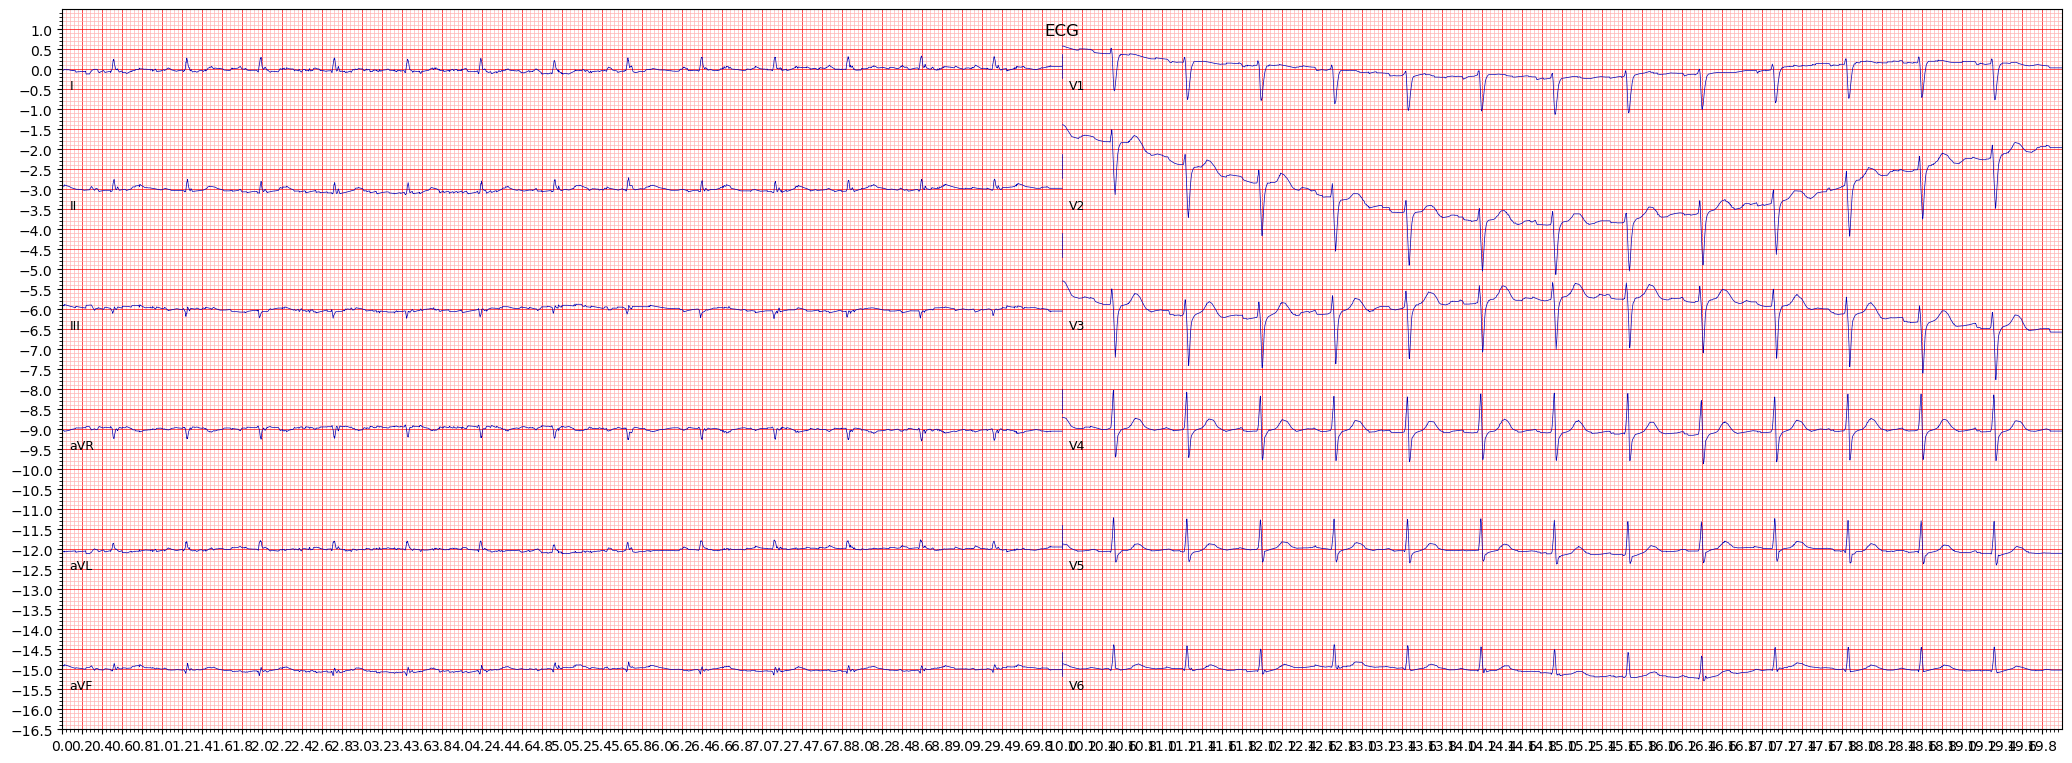

In [7]:
MI_ecg.show_with_grid()

(      ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
 0       0.080   0.037682  81.743869     0.615044            0            0   
 1       0.080   0.038038  81.743869     0.615044            0            0   
 2       0.080   0.038655  81.743869     0.615044            0            0   
 3       0.080   0.039562  81.743869     0.615044            0            0   
 4       0.080   0.040689  81.743869     0.615044            0            0   
 ...       ...        ...        ...          ...          ...          ...   
 4995    0.025  -0.004866  82.191781     0.589919            0            0   
 4996    0.025  -0.004655  82.191781     0.589919            0            0   
 4997    0.025  -0.004444  82.191781     0.589919            0            0   
 4998    0.025  -0.004232  82.191781     0.589919            0            0   
 4999    0.025  -0.004020  82.191781     0.589919            0            0   
 
       ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  E

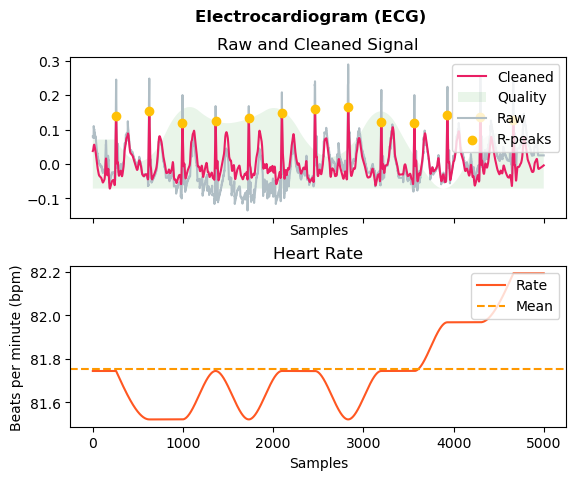

In [9]:
MI_ecg.process_and_plot()

In [ ]:
cleaned = MI_ecg